In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

import tensorflow_datasets as tfds

def process_x(x):
  """Process the given tensors of images."""
  x = x.astype(np.float32)

  # The original data is in [0.0, 255.0].
  # This normalization helps in making them lie between [-1.0, 1.0].
  x /= 255
  #x -= 1.0

  return x

def load_data(ds=keras.datasets.cifar10):
  """Returns the processed dataset."""
  (train_images, train_labels), (test_images, test_labels) = ds.load_data()

  # Process the images for use.
  train_images = process_x(train_images)
  test_images = process_x(test_images)

  return (train_images, train_labels), (test_images, test_labels)

(train_x, train_y), (test_x, test_y) = load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
print(train_x.shape)

(50000, 32, 32, 3)


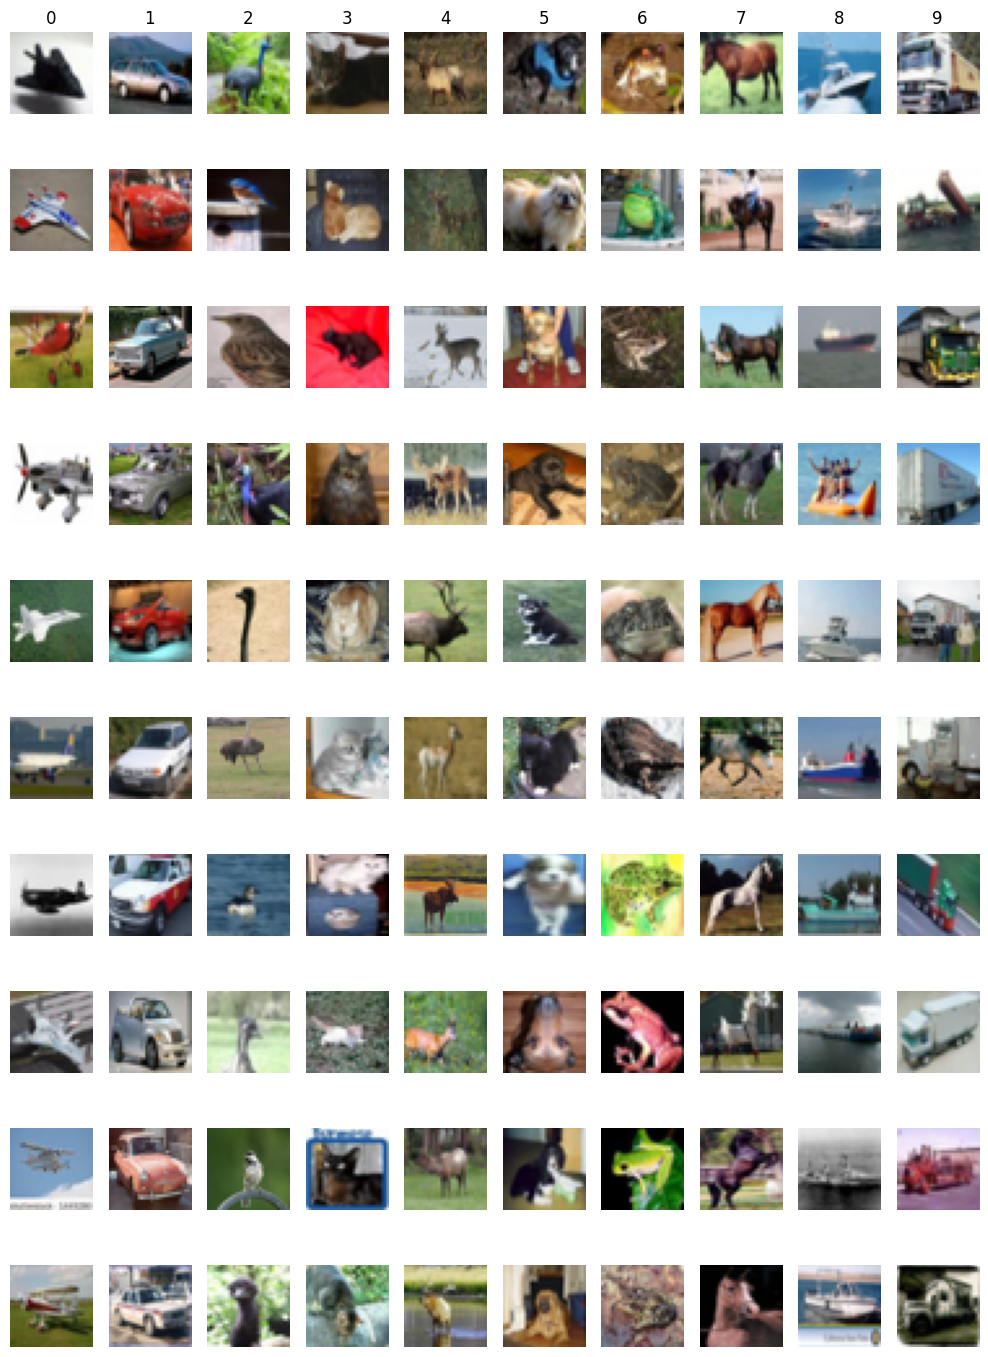

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def collect_samples(x, y, num_classes=10, num_per_class=5):
  sampled_x = None
  sampled_x_idx = 0
  for class_idx in range(num_classes):
    num_collected = 0
    for idx in range(len(x)):
      if num_collected == num_per_class:
        break

      if y[idx] != class_idx:
        continue

      if sampled_x is not None:
        sampled_x = np.concatenate((sampled_x, np.expand_dims(x[idx], 0)))
      else:
        sampled_x = np.expand_dims(x[idx], 0)
      sampled_x_idx = sampled_x_idx + 1
      num_collected = num_collected + 1

  return sampled_x

def show_images(images, num_rows = 1, titles = None):
    """Display a list of images in a single figure with matplotlib. """
    # assert((titles is None)or (len(images) == len(titles)))
    num_images = len(images)
    num_cols = num_images // num_rows

    # plot images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.25 * num_rows, 1.75 * num_cols))

    for i in range(num_images):
      ax = axes[i%num_cols, i//num_cols]
      ax.axis('off')
      ax.imshow(np.squeeze(images[i]), cmap='Greys')
      # ax.add_axes((0, 0, 1, 1))
      if i % num_cols == 0:
        ax.set_title('{}'.format(int(i / num_rows)))
    # plt.tight_layout()
    plt.show()

show_images(collect_samples(train_x, train_y, num_per_class=10), num_rows=10)

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

def create_model(dropout_rate=0.0):
  """Create a simple convolutional network."""
  inputs = keras.Input(shape=(32,32,3))
  x = inputs
  x = layers.Conv2D(32, (3, 3))(x)
  x = layers.Conv2D(32, (3, 3))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  x = layers.Conv2D(64, (3, 3))(x)
  x = layers.Conv2D(64, (3, 3))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  x = layers.Flatten()(x)
  x = layers.Dropout(dropout_rate)(x)
  x = layers.Dense(100)(x)
  x = layers.Dense(10)(x)
  return keras.Model(inputs=inputs, outputs=x)

def get_compiled_model():
  """Create a compiled model (with loss fn, optimizer, metrics, etc.)"""
  model = create_model()
  opt = keras.optimizers.Adam()
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=opt,
                metrics=tf.keras.metrics.SparseCategoricalAccuracy())
  return model

get_compiled_model()

In [5]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

def create_model(dropout_rate=0.3):
  """Create a simple convolutional network."""
  inputs = keras.Input(shape=(32,32,3))
  x = inputs
  x = layers.Conv2D(32, (3, 3))(x)
  x = layers.Conv2D(32, (3, 3))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  x = layers.Conv2D(64, (3, 3))(x)
  x = layers.Conv2D(64, (3, 3))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  x = layers.Flatten()(x)
  x = layers.Dropout(dropout_rate)(x)
  x = layers.Dense(100)(x)
  x = layers.Dense(10)(x)
  return keras.Model(inputs=inputs, outputs=x)
from keras.models import Sequential
from keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
def create_model2():
        model = Sequential()
        model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
        model.add(layers.BatchNormalization())
        model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2,2)))
        model.add(layers.Dropout(0.3))

        model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2,2)))
        model.add(layers.Dropout(0.5))

        model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2,2)))
        model.add(layers.Dropout(0.5))

        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(10))    # num_classes = 10

        # Checking the model summary
        return model
def get_compiled_model():
  """Create a compiled model (with loss fn, optimizer, metrics, etc.)"""
  model = create_model2()
  opt = keras.optimizers.Adam()
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=opt,
                metrics=tf.keras.metrics.SparseCategoricalAccuracy())
  return model

get_compiled_model()

In [6]:
def train_basic_model():
  model = get_compiled_model()
  model.summary()

  model_history = model.fit(
      train_x,
      train_y,
      batch_size=64,
      epochs=25,
      validation_data=(test_x, test_y),
      shuffle=True)

  return model, model_history.history

In [7]:
basic_mnist_model, basic_mnist_model_history = train_basic_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

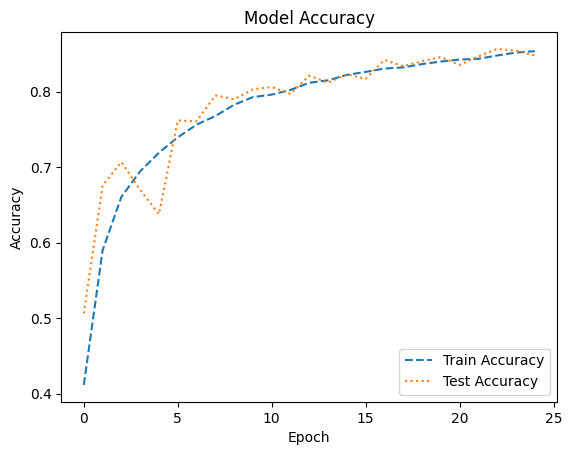

In [8]:
import matplotlib.pyplot as plt

plt.plot(
    basic_mnist_model_history['sparse_categorical_accuracy'],
    linestyle='dashed')
plt.plot(
    basic_mnist_model_history['val_sparse_categorical_accuracy'],
    linestyle='dotted')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

In [11]:
basic_mnist_model.load_weights("/content/weights.h5")

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
basic_mnist_model.save_weights("/content/drive/MyDrive/cifar10customnetmodelweights.h5")